In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from imutils import paths

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
def ceildiv(a, b):
    return -(-a // b)
def plots_from_files(imspaths, figsize=(10,10), rows=1, titles=None, maintitle=None):
    """Plot the images in a grid"""
    f = plt.figure(figsize=figsize)
    if maintitle is not None: plt.suptitle(maintitle, fontsize=10)
    for i in range(len(imspaths)):
        sp = f.add_subplot(rows, ceildiv(len(imspaths), rows), i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        img = plt.imread(imspaths[i])
        plt.imshow(img)

In [ ]:
normal_images = list(paths.list_images(f"{'/content/drive/MyDrive/dataset'}/normal"))
covid_images = list(paths.list_images(f"{'/content/drive/MyDrive/dataset'}/covid"))

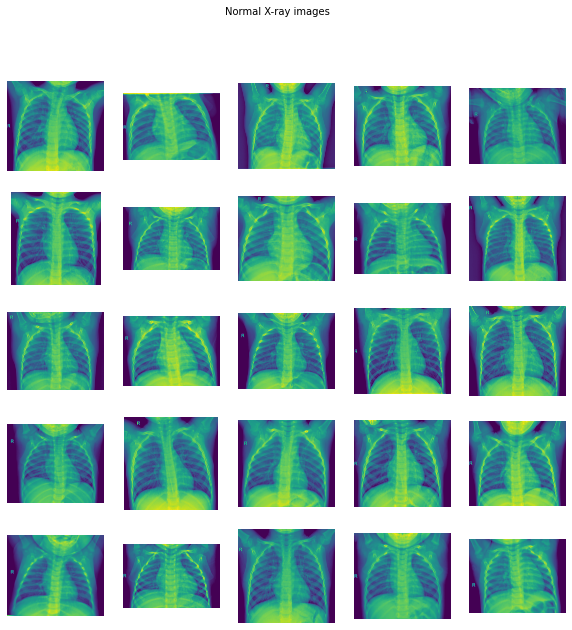

In [ ]:
plots_from_files(normal_images, rows=5, maintitle="Normal X-ray images")

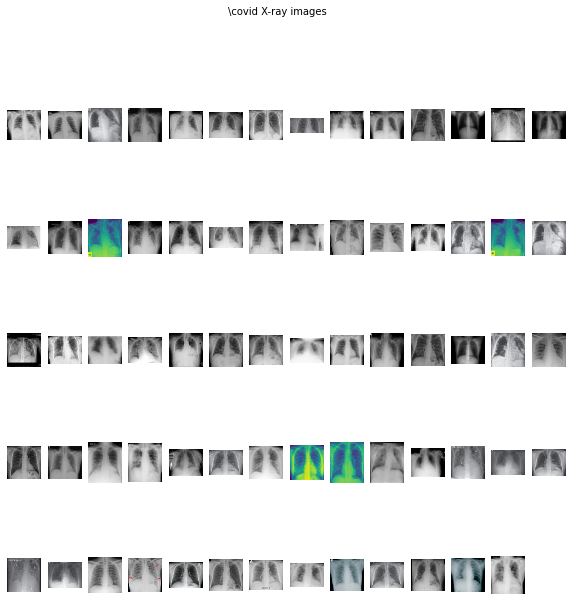

In [ ]:
plots_from_files(covid_images, rows=5, maintitle="\covid X-ray images")

Importing Necessary Libraries

In [ ]:
image_dir_path='/content/drive/MyDrive/dataset'
data_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [ ]:
training_data=data_generator.flow_from_directory(
    image_dir_path,
    seed=42,
    target_size=(32,32),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Validation_data=data_generator.flow_from_directory(
    image_dir_path,
    seed=42,
    target_size=(32,32),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 76 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [ ]:
#using tensorflow sequential model
seq_model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    #tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2,activation='softmax')
])
seq_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
trained_seq_model=seq_model.fit(
    training_data,
    epochs=20,
    validation_data=Validation_data)

Epoch 1/20
3/3 [==============================] - 3s 1s/step - loss: 0.3066 - accuracy: 0.8553 - val_loss: 0.2930 - val_accuracy: 0.9444
Epoch 2/20
3/3 [==============================] - 3s 764ms/step - loss: 0.2599 - accuracy: 0.8421 - val_loss: 0.2361 - val_accuracy: 1.0000
Epoch 3/20
3/3 [==============================] - 3s 1s/step - loss: 0.2376 - accuracy: 0.8553 - val_loss: 0.1922 - val_accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 3s 773ms/step - loss: 0.1983 - accuracy: 0.9211 - val_loss: 0.1775 - val_accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 3s 930ms/step - loss: 0.2211 - accuracy: 0.8947 - val_loss: 0.2348 - val_accuracy: 0.8889
Epoch 6/20
3/3 [==============================] - 3s 1s/step - loss: 0.2103 - accuracy: 0.9079 - val_loss: 0.1567 - val_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 3s 1s/step - loss: 0.2782 - accuracy: 0.8421 - val_loss: 0.1914 - val_accuracy: 1.0000
Epoch 8/20
3/3 [================

1/1 - 0s - loss: 0.1245 - accuracy: 1.0000


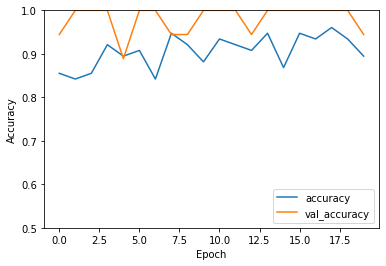

In [ ]:
plt.plot(trained_seq_model.history['accuracy'], label='accuracy')
plt.plot(trained_seq_model.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = seq_model.evaluate(Validation_data, verbose=2)

In [ ]:
seq_model.save('covid_classifier.h5')

In [ ]:
model=tf.keras.models.load_model('/content/covid_classifier.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               921728    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 922,882
Trainable params: 922,882
Non-trainable params: 0
__________________________________________________

In [ ]:
test_img='/content/drive/MyDrive/dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg'

In [ ]:
test_image=tf.keras.preprocessing.image.load_img(test_img,target_size=(32,32,3))
test_image=tf.keras.preprocessing.image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
#test_image=preprocess_input(test_image)
result=model.predict(test_image)
print(result)
if result[0][0]==1:
  print('covid')
else:
  print("non-covid")

[[1. 0.]]
covid
